In [1]:
#This notebook is me playing with data
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#This is an RHN 4-vector file
filename = '../SimulationData/RHN_Utau_LLPweight4vectorBmesonlist_mN_0.1.csv'
data = np.loadtxt(filename, delimiter = ',')

In [3]:
data

array([[ 2.15856973e+08,  2.03599796e-01,  6.76826687e-02,
         1.06912975e-01, -1.24264029e-01],
       [ 2.36699021e+08,  6.07075343e-01,  4.91705155e-01,
         3.69070824e-02, -3.39712203e-01],
       [ 4.98793851e+07,  1.15059633e+00,  6.29100081e-01,
        -4.61520973e-02,  9.57065821e-01],
       ...,
       [ 2.36699021e+08,  8.94664304e-01, -2.45140027e-01,
        -1.37179260e-01, -8.43511964e-01],
       [ 4.98793851e+07,  2.22390514e+00,  3.13741471e-01,
         1.20803003e-01, -2.19607081e+00],
       [ 2.74881740e+05,  2.70352105e+00, -7.18184658e-01,
         1.21492840e+00, -2.30373302e+00]])

In [6]:
weights = np.unique(data.T[0])

Text(0, 0.5, 'Counts')

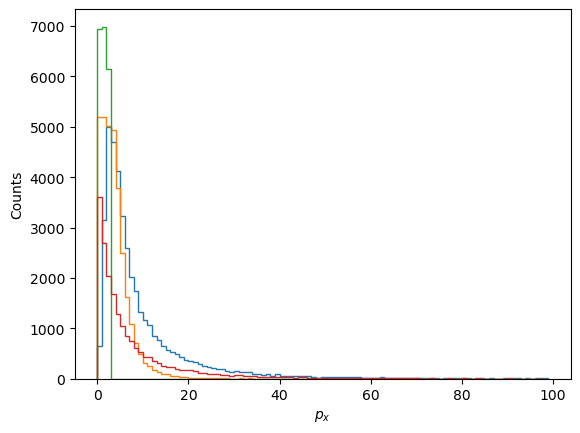

In [20]:
plt.hist(data.T[1][data.T[0] == weights[0]], bins = np.arange(0,100,1), histtype = 'step')
plt.hist(data.T[2][data.T[0] == weights[0]], bins = np.arange(0,100,1), histtype = 'step')
plt.hist(data.T[3][data.T[0] == weights[0]], bins = np.arange(0,100,1), histtype = 'step')
plt.hist(data.T[4][data.T[0] == weights[0]], bins = np.arange(0,100,1), histtype = 'step')
plt.xlabel(r'$p_x$')
plt.ylabel('Counts')

In [27]:
labs = ['$E$', '$p_x$', '$p_y$', '$p_z$']
limits = [100, 25,25,25]

Text(0.02, 0.5, 'Counts')

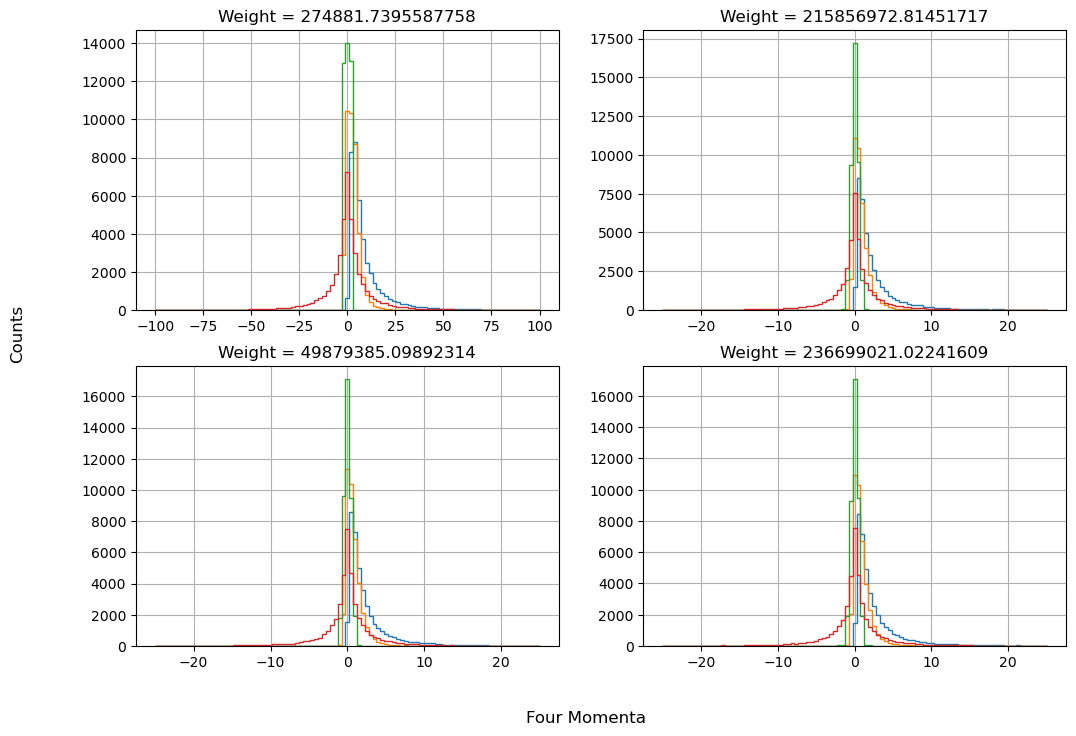

In [29]:
fig, ax = plt.subplots(2,2, figsize = (6 * 2, 4 * 2))
for i, weight in enumerate(weights):
    for j in range(1,5):
        ax[i%2,i//2].hist(data.T[j][data.T[0] == weight], bins = np.linspace(-limits[i],limits[i],100), histtype = 'step', label = labs[j - 1])
    ax[i%2, i//2].set_title(f'Weight = {weight}')
    ax[i%2, i//2].grid()
fig.supxlabel('Four Momenta')
fig.supylabel('Counts')

In [52]:
filename ='../SimulationData/vN_Ntoall_analytical2and3bodydecays_0.1.txt'

In [88]:
storage = []
temp = []
with open(filename) as f:
    f.readline()
    for i,line in enumerate(f.readlines()):
        quantities = line.strip().split(',')
        if quantities == [''] and len(temp) > 0:
            storage.append(temp)
            temp = []
        elif len(quantities) > 1 and quantities[0] != '0.1':
            temp.append(quantities)

In [91]:
np.array(storage, dtype = 'float64')

ValueError: could not convert string to float: ' 1.06445668020139 10  '

In [96]:
for event in storage:
    for particle in event:
        if len(particle) != 6:
            print('flag')